In [1]:
%%time 

import sys
import itertools

sys.path.append('..') # Adds higher directory to python modules path.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from preprocessing.preprocessing_en import preprocess

Wall time: 3.6 s


In [2]:
%%time 

# data
df = preprocess('../../resources/uci-news-aggregator.csv')

Loading data
Data loaded
Actual preprocessing start
Actual preprocessing end
Wall time: 1min 49s


In [3]:
%%time 

df = df[['title', 'class']]
X = df['title']
Y = df['class']

encoder = LabelEncoder()
y = encoder.fit_transform(Y)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Wall time: 528 ms


In [4]:
%%time 

# vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
print(vectorizer.get_feature_names()[:10])

['000', '00007458', '001', '0019', '002', '003', '0030', '003shr', '004', '005']
Wall time: 5.52 s


In [5]:
%%time 

# classification
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\mikol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mikol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Wall time: 13.9 s


In [6]:
%%time 

print('Train & test score')
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

Train & test score
0.9538846227824878
0.9416339188485394
Wall time: 658 ms


[[21694   430   171  1119]
 [  362 29682    96   213]
 [  402   279  8181   162]
 [ 1182   431    84 19996]]
Normalized confusion matrix
Wall time: 497 ms


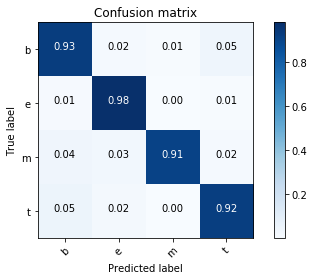

In [7]:
%%time 

y_pred_test = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    

plot_confusion_matrix(cm, encoder.classes_)

In [8]:
%%time 

print(classification_report(y_test, y_pred_test, target_names=encoder.classes_))

              precision    recall  f1-score   support

           b       0.92      0.93      0.92     23414
           e       0.96      0.98      0.97     30353
           m       0.96      0.91      0.93      9024
           t       0.93      0.92      0.93     21693

   micro avg       0.94      0.94      0.94     84484
   macro avg       0.94      0.93      0.94     84484
weighted avg       0.94      0.94      0.94     84484

Wall time: 1.66 s
